# Aggregated BiTE profiles
Aggregate single-cell morphological profiles by condition (drug and concentration) to generate bispecific antibody profiles.

In [1]:
# load third-party Python modules
import javabridge
import bioformats as bf
import skimage
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import re
import os
import sys
import h5py
import json
from sklearn.manifold import TSNE


In [2]:
annot_df = pd.read_csv('../data/BiTE/bite_annot.csv')

In [3]:
prof_dir = '../data/bite_mean_profiles/'

In [4]:
plates = os.listdir(prof_dir)

In [5]:
data_all = []
for plate in plates:
    imgdf = pd.read_csv(os.path.join(prof_dir, plate))
    annot_plate = annot_df[annot_df['plate']==plate.replace('.csv', '')]
    plate_df = pd.merge(imgdf, annot_plate[['well', 'PatientID', 'comb']],on='well')
    plate_df = plate_df.groupby(['PatientID', 'comb'], as_index=False).agg('mean')
    plate_df.index = plate_df['comb']
    plate_df = plate_df.drop('comb', axis=1)
    data_all.append(plate_df)

In [6]:
df_all = pd.concat(data_all)

In [7]:
df_all

,PatientID,ch-Calcein-area,ch-Calcein-mean_intensity,ch-Calcein-solidity,ch-Calcein-extent,ch-Calcein-filled_area,ch-PE-mean_intensity,ch-PE-area,ch-PE-solidity,ch-PE-extent,...,ch-APC-area,ch-APC-mean_intensity,ch-APC-solidity,ch-APC-extent,ch-APC-filled_area,ch-Hoechst-area,ch-Hoechst-mean_intensity,ch-Hoechst-solidity,ch-Hoechst-extent,ch-Hoechst-filled_area
comb,,,,,,,,,,,,,,,,,,,,,
Azetolizumab_3,17LN0054,0.054980,-0.135253,-0.072583,-0.049881,0.057533,-0.127335,-0.136041,-0.093490,-0.153093,...,-0.022076,-0.229770,-0.116159,-0.117148,-0.022529,0.224072,-0.205032,-0.103774,-0.008649,0.222439
BCMA_0.001,17LN0054,-0.098739,0.201681,0.146268,0.072783,-0.104932,0.242453,-0.134882,-0.021881,-0.091804,...,-0.103201,0.115284,0.000902,-0.051282,-0.101884,-0.041813,0.161941,0.172969,0.137595,-0.042837
BCMA_0.01,17LN0054,-0.047244,0.092488,0.043589,0.005074,-0.050045,-0.021016,-0.081274,-0.015698,-0.038700,...,-0.007878,-0.114246,0.071115,0.061935,-0.007569,-0.027066,0.015675,0.026917,0.020573,-0.027001
BCMA_0.1,17LN0054,-0.148822,0.267446,0.233938,0.159890,-0.152977,-0.139193,0.028293,-0.028776,-0.024913,...,0.066841,-0.138347,0.131320,0.130733,0.067750,-0.099033,0.171860,0.139845,0.069111,-0.100512
BCMA_1,17LN0054,-0.072073,0.110869,0.169583,0.128085,-0.072389,-0.338793,0.107526,0.055684,0.064416,...,0.164430,-0.382985,0.009549,0.044764,0.165071,0.039386,-0.036121,0.057204,0.018644,0.037021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lenalidomide_0.5,17LN0024,0.075901,-0.286194,-0.275324,-0.179766,0.094855,-0.217384,-0.106644,-0.017481,0.022452,...,0.282396,-0.029582,-0.028510,0.093702,0.283995,-0.238176,-0.243769,-0.125724,-0.111069,-0.235132
Nivolumab_0.5,17LN0024,-0.081383,-0.260480,-0.296406,-0.281154,-0.084329,-0.363462,-0.245495,-0.182760,-0.248409,...,-0.154721,-0.241674,-0.004963,-0.075404,-0.156561,0.050182,-0.292868,-0.242820,-0.186199,0.053864
Rituximab_10,17LN0024,0.342066,-0.470819,-0.325963,-0.192939,0.353192,-0.824565,0.701385,-0.074330,0.207761,...,0.368782,-0.462654,-0.102370,0.045064,0.365162,0.230374,-0.534967,-0.236715,-0.089201,0.236105


In [8]:
df_wide = pd.pivot_table(df_all, index=df_all.index, columns='PatientID')

In [9]:
df_wide.shape

(74, 580)

/opt/miniconda3/envs/MLnew/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



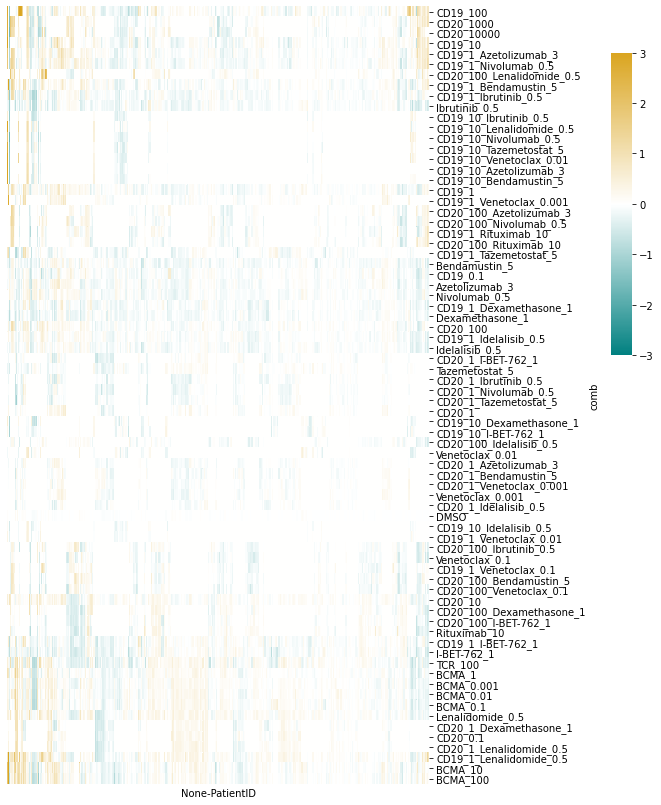

In [10]:
from bioimg.singlecell import plot_heatmap
plot_heatmap(df_wide.fillna(0), xticklabels=False, size=(10,14),
            yticklabels=True, vmin=-3, vmax=3)

In [11]:
df_wide.columns = df_wide.columns.map('|'.join)

In [12]:
df_wide.head()

,ch-APC-area|17LN0002,ch-APC-area|17LN0024,ch-APC-area|17LN0025,ch-APC-area|17LN0027,ch-APC-area|17LN0028,ch-APC-area|17LN0029,ch-APC-area|17LN0046,ch-APC-area|17LN0050,ch-APC-area|17LN0054,ch-APC-area|17LN0055,...,ch-PE-solidity|18LN0118,ch-PE-solidity|18LN0120,ch-PE-solidity|18LN0121,ch-PE-solidity|18LN0124,ch-PE-solidity|18LN0125,ch-PE-solidity|18LN0128,ch-PE-solidity|18LN0130,ch-PE-solidity|19LN0135,ch-PE-solidity|19LN0144,ch-PE-solidity|19LN0147
comb,,,,,,,,,,,,,,,,,,,,,
Azetolizumab_3,-0.120923,-0.177356,NaN,NaN,0.079409,-0.191903,-0.156002,-0.136047,-0.022076,-0.180211,...,-0.133357,-0.224409,-0.036110,-0.169159,-0.182247,-0.161175,-0.189439,0.187888,-0.070528,0.035586
BCMA_0.001,-0.080000,0.230133,NaN,0.135855,0.190645,0.232288,-0.093539,0.072002,-0.103201,0.116144,...,0.134732,-0.000877,0.013322,0.257400,0.039042,0.064336,0.047065,-0.243481,0.102395,0.092186
BCMA_0.01,-0.121775,0.295924,NaN,0.074457,0.237973,0.013191,-0.223404,0.114364,-0.007878,0.214086,...,0.051380,0.179492,0.071914,0.285262,-0.002410,0.135628,0.075206,-0.243235,-0.008026,0.045620
BCMA_0.1,-0.084467,0.380731,-0.222633,0.076396,0.125865,0.301626,-0.189307,0.108774,0.066841,0.336815,...,0.133679,0.191323,-0.024277,0.270794,-0.027037,0.122737,0.072903,-0.419214,0.004597,0.102026
BCMA_1,-0.012013,0.406886,NaN,0.137456,0.093098,0.074036,0.001173,0.005102,0.164430,0.211160,...,0.133392,0.090137,0.063431,0.256022,-0.019508,0.193272,0.039321,-0.243664,-0.005873,0.003312


In [13]:
#df_wide.to_csv('../data/all_bite_profiles.csv')

Collapse concentrations:

In [14]:
combs = annot_df.apply(lambda x: '_'.join([x['BiTE'], x['Drug']]), axis=1).values

In [15]:
combs[combs=='DMSO_DMSO'] = 'DMSO'
combs = [c.replace("_DMSO", '') for c in combs]
combs = [c.replace("DMSO_", '') for c in combs]

In [16]:
annot_df['comb'] = combs

In [17]:
annot_df.head()

,plate,well,PatientID,BiTE,BiTE.Conc,Drug,Drug.Conc,comb
0,BiTE-Tag1,r02c02,18LN0077,DMSO,0.0,DMSO,0.0,DMSO
1,BiTE-Tag1,r02c04,18LN0077,CD19,100.0,DMSO,0.0,CD19
2,BiTE-Tag1,r02c06,18LN0077,DMSO,0.0,I-BET-762,1.0,I-BET-762
3,BiTE-Tag1,r02c08,18LN0077,CD19,1.0,I-BET-762,1.0,CD19_I-BET-762
4,BiTE-Tag1,r02c10,18LN0077,CD20,1.0,I-BET-762,1.0,CD20_I-BET-762


In [18]:
data_all = []
for plate in plates:
    imgdf = pd.read_csv(os.path.join(prof_dir, plate))
    annot_plate = annot_df[annot_df['plate']==plate.replace('.csv', '')]
    plate_df = pd.merge(imgdf, annot_plate[['well', 'PatientID', 'comb']],on='well')
    # take extreme values
    plate_df = (plate_df.
                groupby(['PatientID', 'comb'],
                        as_index=False).
                agg(lambda x: np.max(x) if np.abs(np.max(x)) > np.abs(np.min(x)) else np.min(x)))
    plate_df.index = plate_df['comb']
    plate_df = plate_df.drop('comb', axis=1)
    data_all.append(plate_df)

In [19]:
df_all = pd.concat(data_all)
df_wide = pd.pivot_table(df_all, index=df_all.index, columns='PatientID')
df_wide.columns = df_wide.columns.map('|'.join)

In [20]:
# df_wide.to_csv('../data/bite_comb_profiles.csv')